# Exploración y visualización de datos data_car

En este cuaderno se realizará una exploración exhaustiva del dataset: https://github.com/Cogito2012/CarCrashDataset, el cual contiene dos categorías:
- **Normal_Videos_for_Event_Recognition:** videos sin accidentes de coche.
- **CrashAccidents:** videos de accidentes de coche.

Los pasos que se llevarán a cabo son:
1. Descargar el dataset desde mi Google Drive personal usando **PyDrive2**.
2. Explorar la estructura de carpetas y listar los archivos.
3. Extraer metadatos de cada video:
   - Resolución (ancho y alto).
   - Frames por segundo (fps).
   - Número de frames.
   - Duración (en segundos).
   - Tamaño del archivo.
4. Organizar la información en un DataFrame para realizar análisis estadísticos.
5. Visualizar la distribución de duraciones y resoluciones mediante gráficas.
6. Extraer y mostrar frames de ejemplo de algunos videos por categoría.

In [ ]:
# Instalamos PyDrive para la descarga desde Google Drive y opencv-python para el procesamiento de video.
!pip install --upgrade gdown opencv-python-headless
!pip install -U PyDrive2

## Paso 1: Descargar el dataset desde mi Google Drive personal usando PyDrive2.

In [ ]:
# Importar las librerías necesarias y realizar la autenticación
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Autenticación con Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def download_folder(drive, folder_id, local_path):
    # Crea la carpeta local si no existe
    if not os.path.exists(local_path):
        os.makedirs(local_path)
        print(f"Creando directorio local: {local_path}")

    # Lista todos los archivos y subcarpetas de la carpeta actual (excluyendo los que estén en la papelera)
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

    # Itera sobre cada elemento encontrado
    for file in file_list:
        file_title = file['title']
        mime_type = file['mimeType']
        # Verifica si es una carpeta de Google Drive
        if mime_type == 'application/vnd.google-apps.folder':
            print(f"Descargando carpeta: {file_title}")
            # Ruta local para la subcarpeta
            new_local_path = os.path.join(local_path, file_title)
            # Llamada recursiva para descargar el contenido de la subcarpeta
            download_folder(drive, file['id'], new_local_path)
        else:
            # Es un archivo, se descarga en la ruta local especificada
            print(f"Descargando archivo: {file_title}")
            destination = os.path.join(local_path, file_title)
            file.GetContentFile(destination)

# Descargar la carpeta "Normal_Videos_for_Event_Recognition"
print("Iniciando descarga de 'Normal_Videos_for_Event_Recognition'...")
download_folder(drive, '1vuod5_5Ao03CvbDql4S1GBHYZ1MpQPrz', 'Normal_Videos_for_Event_Recognition')
print("Descarga de 'Normal_Videos_fro_Event_Recognition' completada.\n")

# Descargar la carpeta "CrashAccidents"
print("Iniciando descarga de 'CrashAccidents'...")
download_folder(drive, '1cL2a5r3ZR6Sh6rl5T9VicICYM0AnFAsN', 'CrashAccidents')
print("Descarga de 'CrashAccidents' completada.")

Iniciando descarga de 'Normal_Videos_for_Event_Recognition'...
Creando directorio local: Normal_Videos_for_Event_Recognition
Descargando archivo: 001600.mp4
Descargando archivo: 001598.mp4
Descargando archivo: 001599.mp4
Descargando archivo: 001597.mp4
Descargando archivo: 001596.mp4
Descargando archivo: 001595.mp4
Descargando archivo: 001594.mp4
Descargando archivo: 001592.mp4
Descargando archivo: 001591.mp4
Descargando archivo: 001593.mp4
Descargando archivo: 001588.mp4
Descargando archivo: 001589.mp4
Descargando archivo: 001590.mp4
Descargando archivo: 001587.mp4
Descargando archivo: 001585.mp4
Descargando archivo: 001586.mp4
Descargando archivo: 001582.mp4
Descargando archivo: 001584.mp4
Descargando archivo: 001583.mp4
Descargando archivo: 001579.mp4
Descargando archivo: 001581.mp4
Descargando archivo: 001580.mp4
Descargando archivo: 001578.mp4
Descargando archivo: 001577.mp4
Descargando archivo: 001576.mp4
Descargando archivo: 001575.mp4
Descargando archivo: 001573.mp4
Descargando

## Paso 2: Explorar la estructura de carpetas y listar los archivos.

In [ ]:
# Lista de rutas de los datasets
datasets = [
    '/content/Normal_Videos_for_Event_Recognition',
    '/content/CrashAccidents'
]

# Iteramos sobre cada dataset y mostramos su estructura de carpetas y archivos
for dataset_dir in datasets:
    print("=" * 50)
    print(f"Estructura de carpetas y archivos en el dataset: {dataset_dir}")

    for root, dirs, files in os.walk(dataset_dir):
        # Calculamos el nivel de profundidad para establecer la indentación
        level = root.replace(dataset_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")

Estructura de carpetas y archivos en el dataset: /content/Normal_Videos_for_Event_Recognition
Normal_Videos_for_Event_Recognition/
    001161.mp4
    001503.mp4
    000220.mp4
    000892.mp4
    000319.mp4
    000773.mp4
    000157.mp4
    001573.mp4
    001561.mp4
    000793.mp4
    000498.mp4
    001552.mp4
    000020.mp4
    001191.mp4
    000265.mp4
    000758.mp4
    001436.mp4
    001598.mp4
    001194.mp4
    000573.mp4
    001428.mp4
    000346.mp4
    000661.mp4
    001240.mp4
    001003.mp4
    000166.mp4
    001288.mp4
    001346.mp4
    000121.mp4
    001245.mp4
    000301.mp4
    001088.mp4
    000282.mp4
    000366.mp4
    000999.mp4
    000775.mp4
    001156.mp4
    000091.mp4
    000543.mp4
    000138.mp4
    000678.mp4
    001047.mp4
    000158.mp4
    000181.mp4
    000116.mp4
    000530.mp4
    001300.mp4
    000209.mp4
    000060.mp4
    000830.mp4
    000219.mp4
    000549.mp4
    001075.mp4
    000524.mp4
    001244.mp4
    000916.mp4
    000940.mp4
    000666.mp4

## Paso 3: Extraer metadatos de cada video

In [ ]:
import os
import cv2
import pandas as pd

# Definir las rutas de las carpetas directamente en el directorio raíz
normal_folder = '/content/Normal_Videos_for_Event_Recognition'
accident_folder = '/content/CrashAccidents'

# Extensiones de video comunes para filtrar los archivos
video_extensions = ('.mp4', '.avi', '.mov', '.mkv')

def get_video_metadata(video_path):
    """
    Extrae metadatos del video: fps, número de frames, resolución (ancho y alto),
    duración en segundos y tamaño del archivo en MB.
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error al abrir el video: {video_path}")
        return None

    # Obtener propiedades del video
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Calcular la duración del video en segundos
    duration = frame_count / fps if fps > 0 else 0

    cap.release()

    # Obtener el tamaño del archivo en MB
    file_size = os.path.getsize(video_path) / (1024 * 1024)

    return {
        'video_path': video_path,
        'fps': fps,
        'frame_count': frame_count,
        'width': width,
        'height': height,
        'duration_sec': duration,
        'file_size_MB': file_size
    }

def list_videos(folder):
    """
    Retorna la lista de archivos de video en una carpeta, filtrando por las extensiones definidas.
    """
    return [os.path.join(folder, f) for f in os.listdir(folder)
            if f.lower().endswith(video_extensions)]

# Obtener la lista de videos en cada carpeta
normal_videos = list_videos(normal_folder)
accident_videos = list_videos(accident_folder)

print("Número de videos sin accidente:", len(normal_videos))
print("Número de videos con accidente:", len(accident_videos))

# Recopilación de metadatos de cada video y asignación de la categoría correspondiente
metadata_list = []

# Procesar videos sin accidente
for video in normal_videos:
    meta = get_video_metadata(video)
    if meta is not None:
        meta['categoria'] = 'Sin Accidente'
        metadata_list.append(meta)

# Procesar videos con accidente
for video in accident_videos:
    meta = get_video_metadata(video)
    if meta is not None:
        meta['categoria'] = 'Con Accidente'
        metadata_list.append(meta)

# Crear un DataFrame con la información recopilada
df_videos = pd.DataFrame(metadata_list)

# Mostrar las primeras filas del DataFrame
print(df_videos.head())

Número de videos sin accidente: 1600
Número de videos con accidente: 1500
                                          video_path   fps  frame_count  \
0  /content/Normal_Videos_for_Event_Recognition/0...  10.0         50.0   
1  /content/Normal_Videos_for_Event_Recognition/0...  10.0         50.0   
2  /content/Normal_Videos_for_Event_Recognition/0...  10.0         50.0   
3  /content/Normal_Videos_for_Event_Recognition/0...  10.0         50.0   
4  /content/Normal_Videos_for_Event_Recognition/0...  10.0         50.0   

    width  height  duration_sec  file_size_MB      categoria  
0  1280.0   720.0           5.0      0.990840  Sin Accidente  
1  1280.0   720.0           5.0      0.693669  Sin Accidente  
2  1280.0   720.0           5.0      1.273226  Sin Accidente  
3  1280.0   720.0           5.0      3.259964  Sin Accidente  
4  1280.0   720.0           5.0      2.648817  Sin Accidente  


## Paso 4: Análisis estadísticos.

In [ ]:
# Mostrar estadísticas generales de los videos
print("Estadísticas generales del dataset:")
display(df_videos.describe())

# Mostrar estadísticas separadas por categoría
print("Estadísticas por categoría:")
display(df_videos.groupby('categoria').describe())

Estadísticas generales del dataset:


,fps,frame_count,width,height,duration_sec,file_size_MB
count,3100.0,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,10.0,49.999677,1274.425806,717.793548,4.999968,1.327958
std,0.0,0.017961,54.853138,28.101760,0.001796,1.149320
min,10.0,49.000000,640.000000,360.000000,4.900000,0.169565
25%,10.0,50.000000,1280.000000,720.000000,5.000000,0.500873
50%,10.0,50.000000,1280.000000,720.000000,5.000000,0.841648
75%,10.0,50.000000,1280.000000,720.000000,5.000000,1.850494
max,10.0,50.000000,1280.000000,720.000000,5.000000,7.670133


Estadísticas por categoría:


fps                                          frame_count  \
                count  mean  std   min   25%   50%   75%   max       count   
categoria                                                                    
Con Accidente  1500.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0      1500.0   
Sin Accidente  1600.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0      1600.0   

                          ... duration_sec      file_size_MB            \
                    mean  ...          75%  max        count      mean   
categoria                 ...                                            
Con Accidente  50.000000  ...          5.0  5.0       1500.0  0.547387   
Sin Accidente  49.999375  ...          5.0  5.0       1600.0  2.059743   

                                                                           
                    std       min       25%       50%       75%       max  
categoria                                                                  
Con Accidente  0.204925  0.188253  0.400299  0.502025  0.653769  1.789472  
Sin Accidente  1.188827  0.169565  1.177198  1.792410  2.702784  7.670133  

[2 rows x 48 columns]

La duración de los videos es de 5 segundos a 10 frames por segundo (fps)

## Paso 5: Visualizar la distribución de duraciones y resoluciones mediante gráficas.

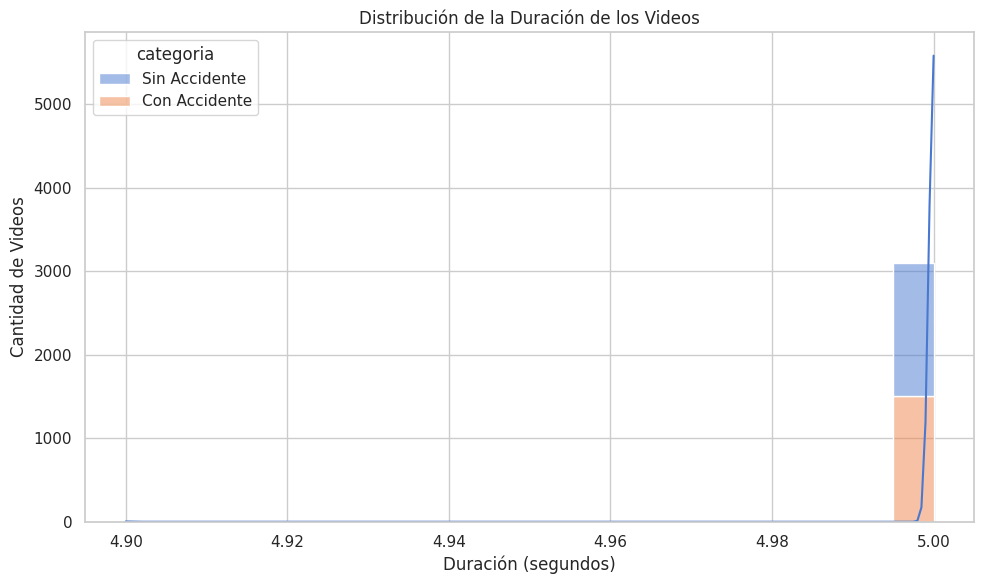

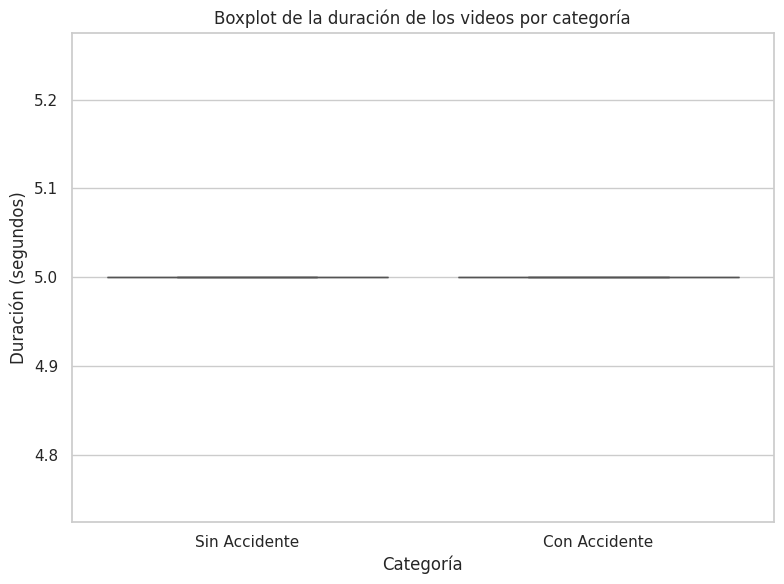

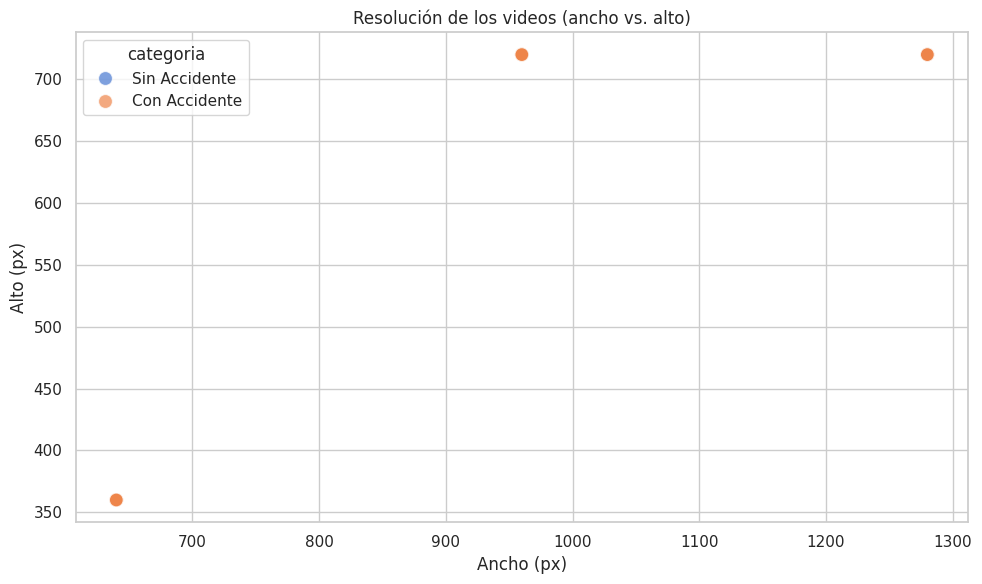

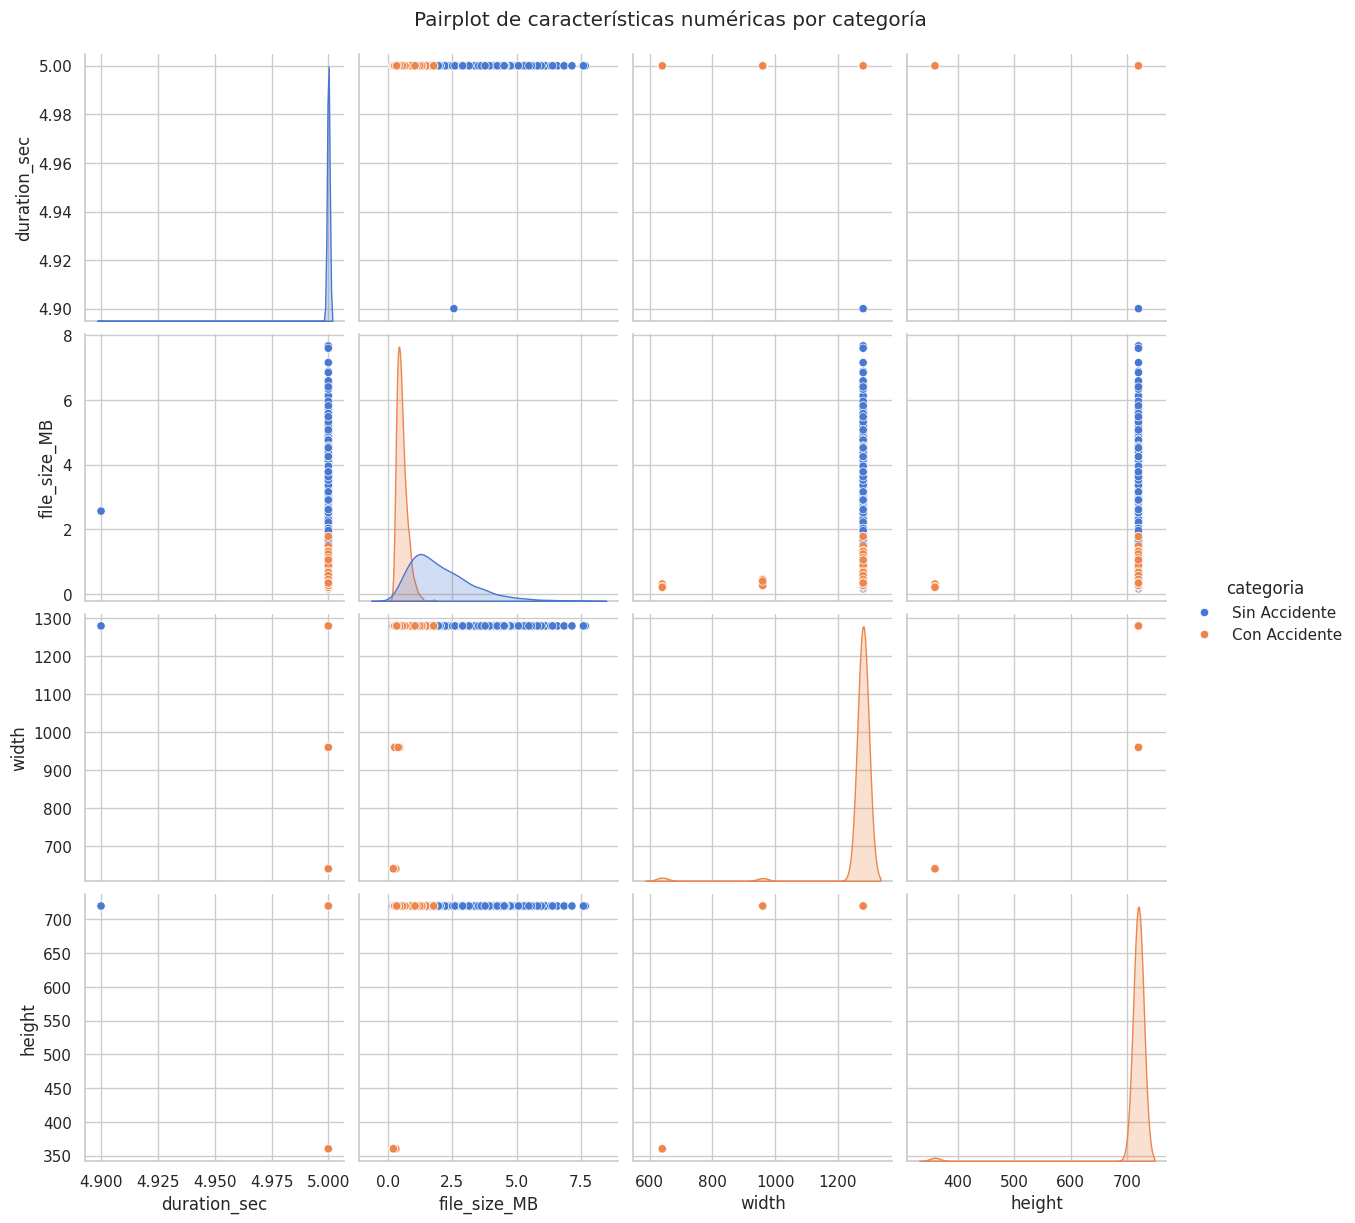

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de seaborn
sns.set(style="whitegrid", palette="muted")

# -------------------------------
# Histograma de la duración de los videos por categoría
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_videos,
    x="duration_sec",
    hue="categoria",
    kde=True,         # Dibuja la curva de densidad
    bins=20,
    multiple="stack"  # Apila las barras para ver mejor la contribución de cada categoría
)
plt.title("Distribución de la Duración de los Videos")
plt.xlabel("Duración (segundos)")
plt.ylabel("Cantidad de Videos")
plt.tight_layout()
plt.show()

# -------------------------------
# Boxplot de la duración por categoría (sin outliers para mayor claridad)
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="categoria",
    y="duration_sec",
    data=df_videos,
    showfliers=False  # No muestra los outliers para una visualización más limpia
)
plt.title("Boxplot de la duración de los videos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Duración (segundos)")
plt.tight_layout()
plt.show()

# -------------------------------
# Scatter plot de la resolución (ancho vs. alto) por categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_videos,
    x="width",
    y="height",
    hue="categoria",
    s=100,      # Tamaño de los puntos
    alpha=0.7   # Transparencia de los puntos
)
plt.title("Resolución de los videos (ancho vs. alto)")
plt.xlabel("Ancho (px)")
plt.ylabel("Alto (px)")
plt.tight_layout()
plt.show()

# -------------------------------
# Pairplot de algunas características numéricas por categoría
numeric_cols = ['duration_sec', 'file_size_MB', 'width', 'height']
sns.pairplot(
    df_videos[numeric_cols + ['categoria']],
    hue="categoria",
    height=3,
    diag_kind='kde'
)
plt.suptitle("Pairplot de características numéricas por categoría", y=1.02)
plt.show()

## Paso 6: Extraer y mostrar frames de ejemplo de algunos videos por categoría.

Número de videos sin accidente: 1600
Número de videos con accidente: 1500


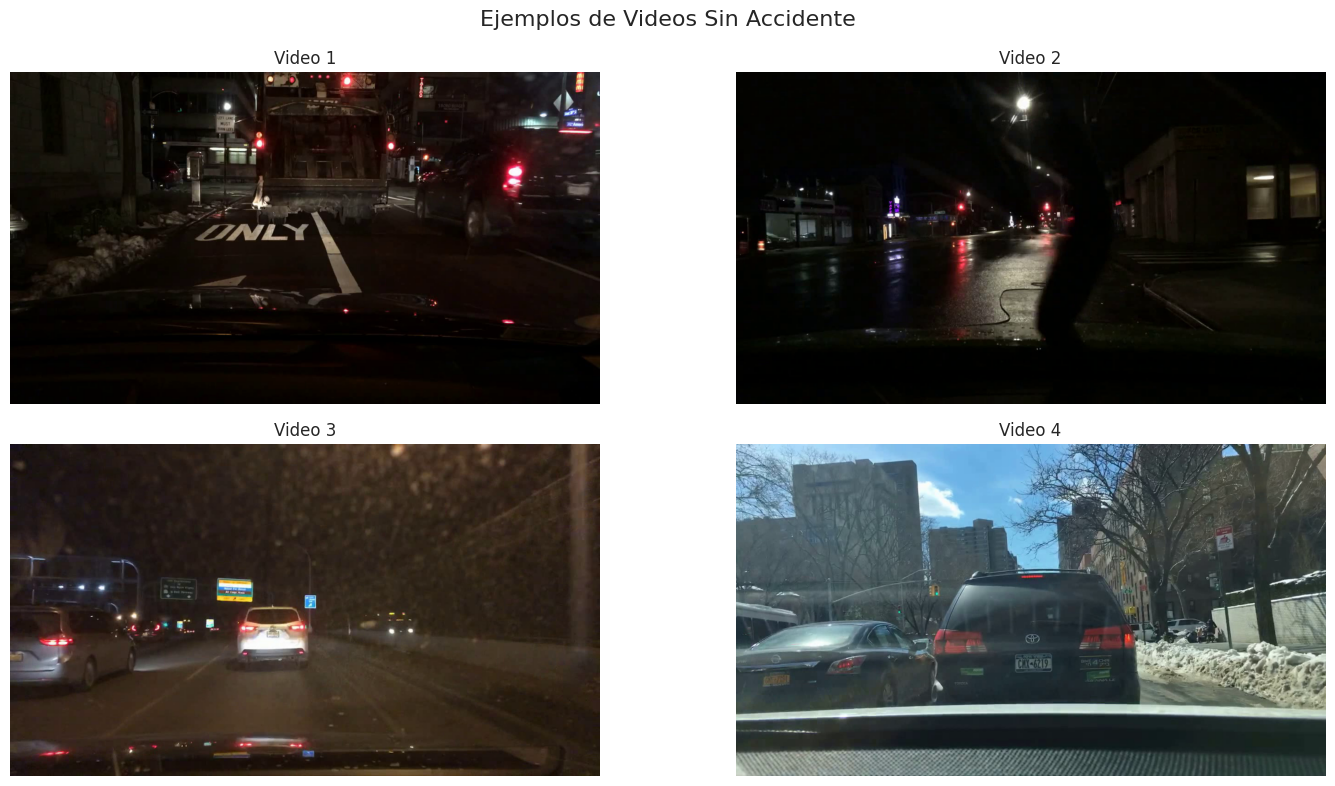

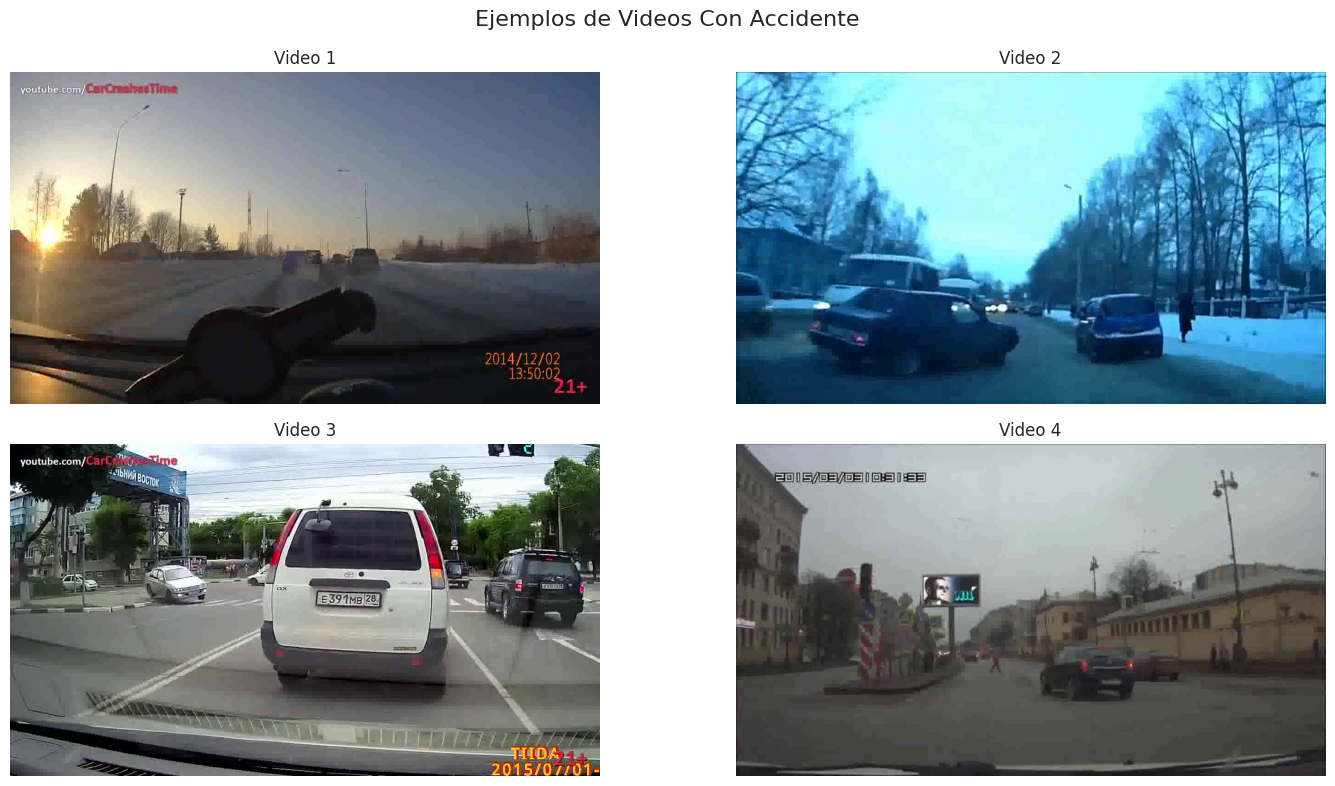

In [ ]:
# Como las carpetas se encuentran en el directorio raíz, definimos las rutas directamente:
normal_folder = '/content/Normal_Videos_for_Event_Recognition'
accident_folder = '/content/CrashAccidents'

# Extensiones de video comunes
video_extensions = ('.mp4', '.avi', '.mov', '.mkv')

def list_videos(folder):
    """
    Retorna una lista de rutas de archivos de video en la carpeta,
    filtrando por las extensiones definidas.
    """
    return [os.path.join(folder, f) for f in os.listdir(folder)
            if f.lower().endswith(video_extensions)]

# Obtener listas de videos para cada categoría
normal_videos = list_videos(normal_folder)
accident_videos = list_videos(accident_folder)

print(f"Número de videos sin accidente: {len(normal_videos)}")
print(f"Número de videos con accidente: {len(accident_videos)}")

def extract_frame(video_path, position='middle'):
    """
    Extrae un frame del video.
    Por defecto, extrae el frame central. Si position es 'first', extrae el primer frame.
    Retorna la imagen en formato RGB o None si falla.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error al abrir el video: {video_path}")
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames <= 0:
        cap.release()
        return None

    # Determinar qué frame extraer: frame central o el primero
    frame_id = 0 if position == 'first' else total_frames // 2

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    cap.release()

    if ret:
        # Convertir de BGR a RGB para una correcta visualización en matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        return frame_rgb
    else:
        return None

def display_frame_grid(video_paths, title, max_videos=4, position='middle'):
    """
    Muestra una grilla de frames extraídos de una lista de videos.
    Se muestran hasta 'max_videos' frames.
    """
    n = min(len(video_paths), max_videos)

    # Configuración de la grilla: 1x1 para 1 video, 1x2 para 2 y 2x2 para 3 o 4 videos
    if n == 1:
        rows, cols = 1, 1
    elif n == 2:
        rows, cols = 1, 2
    else:
        rows, cols = 2, 2

    fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

    # Si hay un solo subplot, convertirlo a lista para iterar de forma homogénea.
    if n == 1:
        axs = [axs]
    else:
        axs = axs.flatten()

    for i in range(n):
        frame = extract_frame(video_paths[i], position=position)
        if frame is not None:
            axs[i].imshow(frame)
            axs[i].set_title(f"Video {i+1}")
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, "No se pudo extraer el frame", ha='center', va='center')
            axs[i].axis('off')

    # Ocultar subplots adicionales (si la grilla es mayor que 'n')
    for j in range(n, len(axs)):
        axs[j].axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Mostrar ejemplos de videos sin accidente
if len(normal_videos) > 0:
    display_frame_grid(normal_videos, "Ejemplos de Videos Sin Accidente", max_videos=4, position='middle')
else:
    print("No se encontraron videos en la carpeta 'Normal_Videos_for_Event_Recognition'.")

# Mostrar ejemplos de videos con accidente
if len(accident_videos) > 0:
    display_frame_grid(accident_videos, "Ejemplos de Videos Con Accidente", max_videos=4, position='middle')
else:
    print("No se encontraron videos en la carpeta 'CrashAccidents'.")